### Training Progress

Some plots to show the status of animal training on an animal by animal basis. Specifically focusing on the last month when training has stabilized and stage 8 encompasses many things. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datajoint as dj
import pandas as pd
import os
import re
import seaborn as sns
import pandas as pd
from pathlib import Path
from datetime import date, timedelta

from performance_plots import * 
from io_utils import *

# settings
%load_ext autoreload
%autoreload 2
dj.blob.use_32bit_dims = True # necessary for pd.blob read
sns.set_context("talk")

In [3]:
df_all = fetch_latest_training_data()
antibias_working = pd.Timestamp(2022,8,5) # the day antibias was fixed
training_stabilizing = pd.Timestamp(2022,8,17)
df_antib =  df_all[(df_all['date'] > antibias_working)]
df_stable = df_all[(df_all['date'] > training_stabilizing)]

dropping 0 sessions of 97
fetched 97 sessions for R500 with latest date 2022-11-01
dropping 0 sessions of 100
fetched 100 sessions for R501 with latest date 2022-11-01
dropping 1 sessions of 103
fetched 102 sessions for R502 with latest date 2022-11-01
dropping 1 sessions of 100
fetched 99 sessions for R503 with latest date 2022-11-01
dropping 1 sessions of 100
fetched 99 sessions for R600 with latest date 2022-11-01


### R500


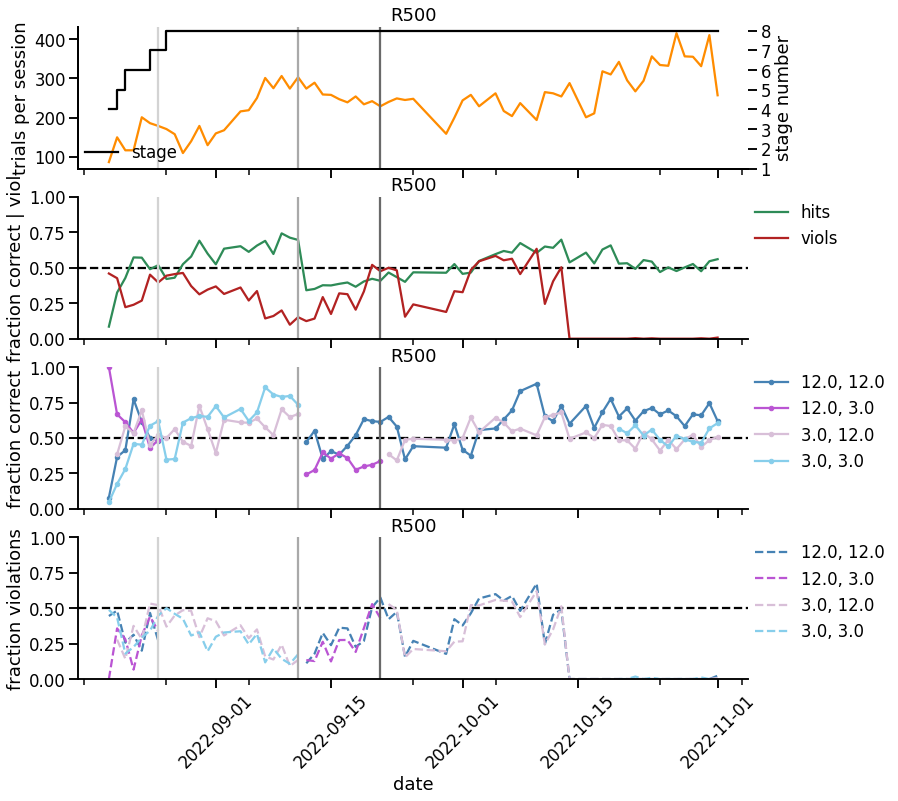

In [4]:
fig, axs = plt.subplots(4, 1, figsize=(12, 12), sharex=True)
animal_id = 'R500'
df = df_stable.query("animal_id == 'R500'")
plot_stage_and_trials(df, axs[0], animal_id)
plot_hits_and_viols(df, axs[1], animal_id)
plot_pair_performance(df, axs[2], animal_id)
plot_pair_violations(df, axs[3], animal_id)

for iax in range(len(axs)):
    axs[iax].axvline(pd.Timestamp('2022-08-25'),color='lightgray')
    axs[iax].axvline(pd.Timestamp('2022-09-11'), color='darkgray')
    axs[iax].axvline(pd.Timestamp('2022-09-21'), color='dimgray')
    if iax > 0:
        axs[iax].axhline(0.5, color='k', linestyle='--', zorder=1)


12.0, 12.0     43
3.0, 3.0       91
3.0, 12.0     123
Name: sound_pair, dtype: int64


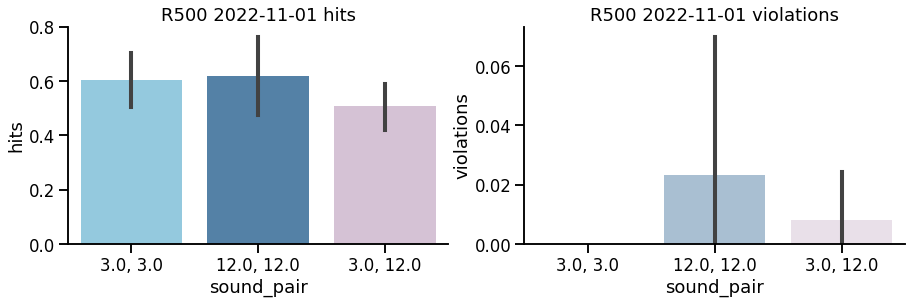

In [5]:
fig,ax = plt.subplots(1,2, figsize=(15,4))
single_day_pair_perf(df, ax[0])
single_day_pair_viols(df, ax[1])

### R501


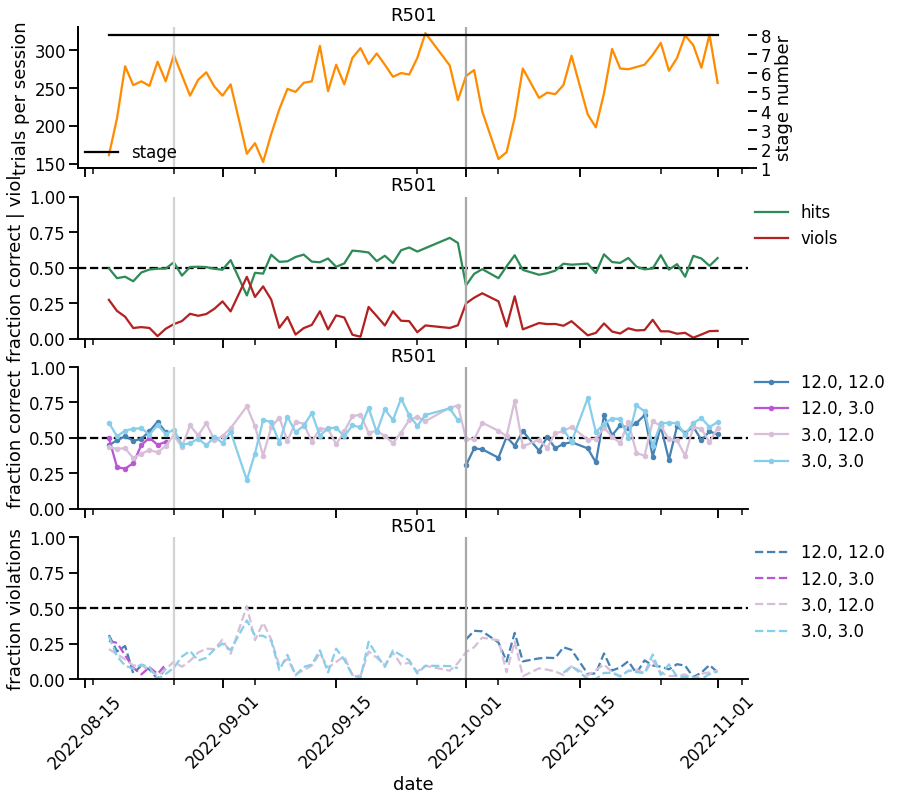

In [6]:
fig, axs = plt.subplots(4, 1, figsize=(12, 12), sharex=True)
animal_id = 'R501'
df = df_stable.query("animal_id == 'R501'")
plot_stage_and_trials(df, axs[0], animal_id)
plot_hits_and_viols(df, axs[1], animal_id)
plot_pair_performance(df, axs[2], animal_id)
plot_pair_violations(df, axs[3], animal_id)

for iax in range(len(axs)):
    axs[iax].axvline(pd.Timestamp('2022-08-26'),color='lightgray')
    axs[iax].axvline(pd.Timestamp('2022-10-01'),color='darkgray')
    if iax > 0:
        axs[iax].axhline(0.5, color='k', linestyle='--', zorder=1)


12.0, 12.0     64
3.0, 3.0       57
3.0, 12.0     136
Name: sound_pair, dtype: int64


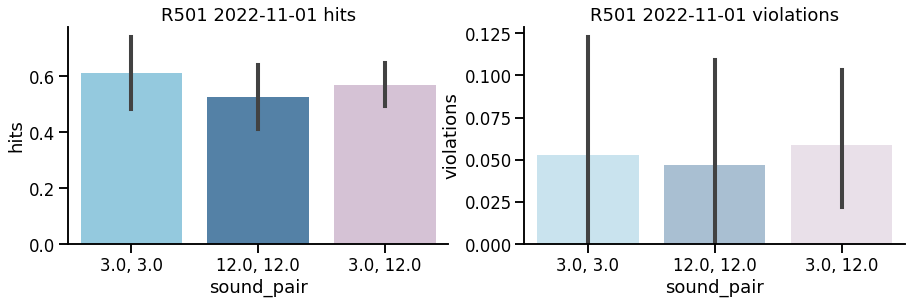

In [7]:
fig,ax = plt.subplots(1,2, figsize=(15,4))
single_day_pair_perf(df, ax[0])
single_day_pair_viols(df, ax[1])

### R502

This animal is super motivated but is doing really, really short fixations (~ 0.5s) because he has one pace of center left center right. Just seems to be catching onto rule and might be ready to switch though

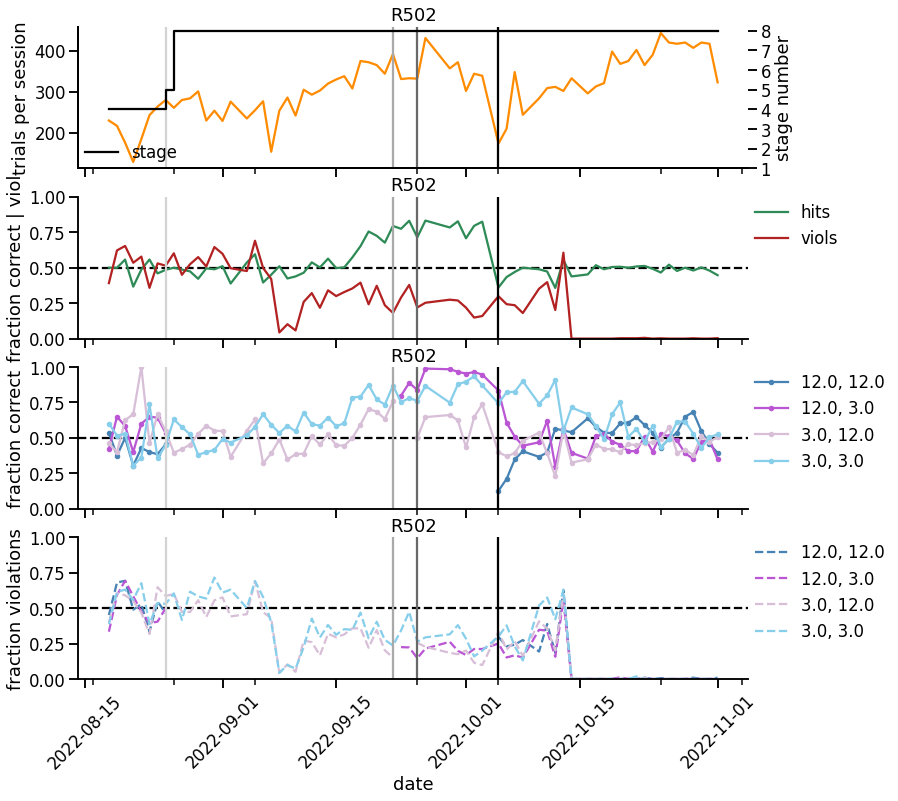

In [8]:
fig, axs = plt.subplots(4, 1, figsize=(12, 12), sharex=True)
animal_id = 'R502'
df = df_stable.query("animal_id == 'R502'")
plot_stage_and_trials(df, axs[0], animal_id)
plot_hits_and_viols(df, axs[1], animal_id)
plot_pair_performance(df, axs[2], animal_id)
plot_pair_violations(df, axs[3], animal_id)

for iax in range(len(axs)):
    axs[iax].axvline(pd.Timestamp('2022-08-25'),color='lightgray')
    axs[iax].axvline(pd.Timestamp('2022-09-22'),color='darkgray')
    axs[iax].axvline(pd.Timestamp('2022-09-25'),color='dimgray')
    axs[iax].axvline(pd.Timestamp('2022-10-05'),color='black')


    if iax > 0:
        axs[iax].axhline(0.5, color='k', linestyle='--', zorder=1)


12.0, 12.0    115
3.0, 3.0       61
12.0, 3.0      46
3.0, 12.0     101
Name: sound_pair, dtype: int64


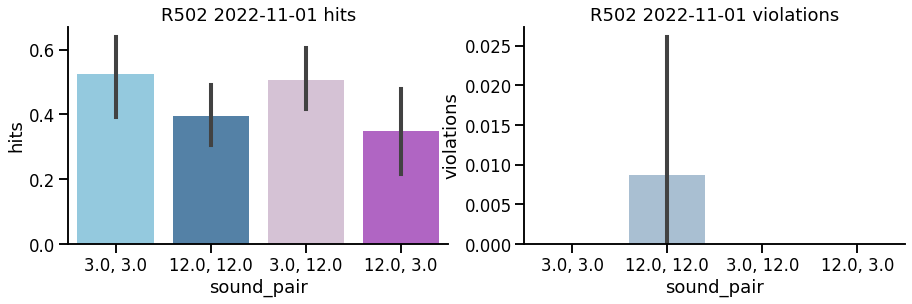

In [9]:
fig,ax = plt.subplots(1,2, figsize=(15,4))
single_day_pair_perf(df, ax[0])
single_day_pair_viols(df, ax[1])

### R503

Similar to R501, hit 3 days at 70% correct at 3-3, 3-12 and is now on the second set of pairs (12-12, 12-3) and was a bit stuck but is now making progress. Rule reversal doesn't seem like the best option. Want to switch to an sa rule next.

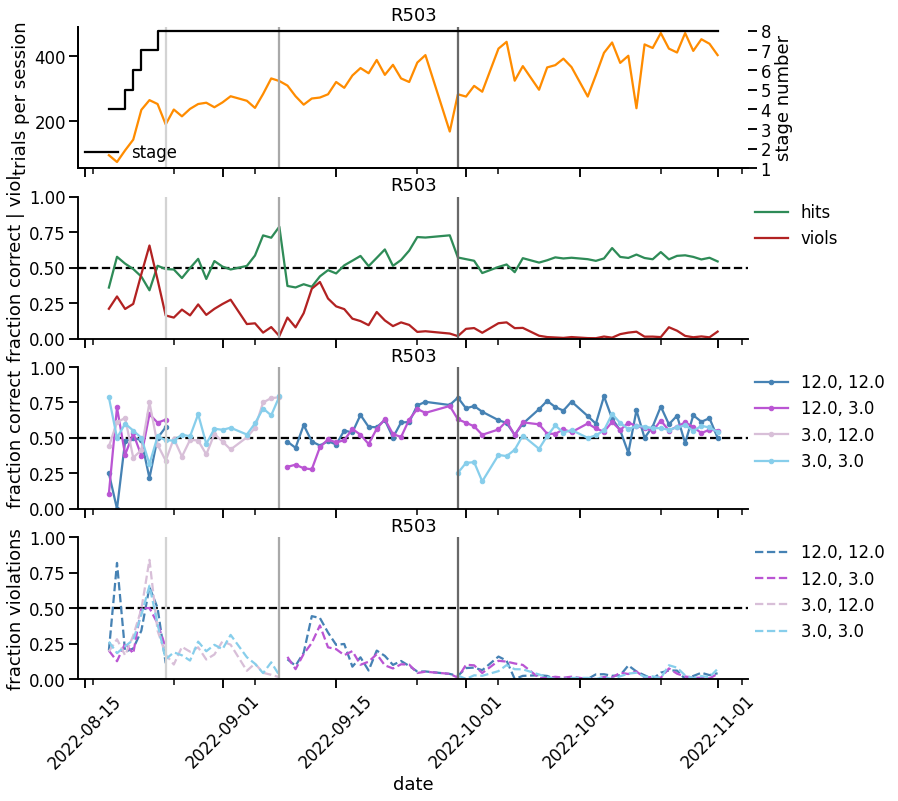

In [10]:
fig, axs = plt.subplots(4, 1, figsize=(12, 12), sharex=True)
animal_id = 'R503'
df = df_stable.query("animal_id == 'R503'")
plot_stage_and_trials(df, axs[0], animal_id)
plot_hits_and_viols(df, axs[1], animal_id)
plot_pair_performance(df, axs[2], animal_id)
plot_pair_violations(df, axs[3], animal_id)

for iax in range(len(axs)):
    axs[iax].axvline(pd.Timestamp('2022-08-25'),color='lightgray')
    axs[iax].axvline(pd.Timestamp('2022-09-08'),color='darkgray')
    axs[iax].axvline(pd.Timestamp('2022-09-30'),color='dimgray')

    if iax > 0:
        axs[iax].axhline(0.5, color='k', linestyle='--', zorder=1)


3.0, 3.0      155
12.0, 12.0     25
12.0, 3.0     224
Name: sound_pair, dtype: int64


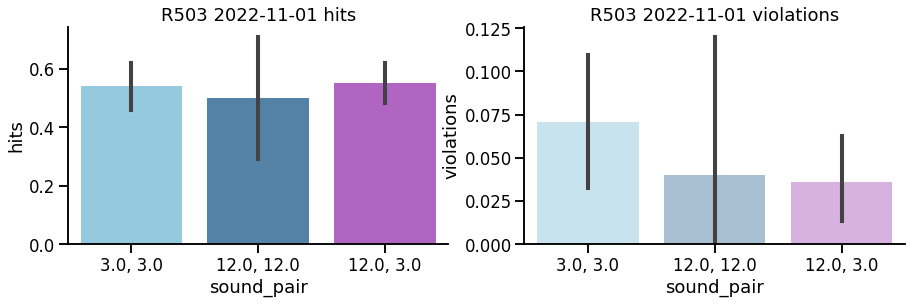

In [11]:
fig,ax = plt.subplots(1,2, figsize=(15,4))
single_day_pair_perf(df, ax[0])
single_day_pair_viols(df, ax[1])

### R600

Learned Sb rule, then sa rule now figuring out what to do next. 3 pairs or all 4? Want to see stable perf above 70%

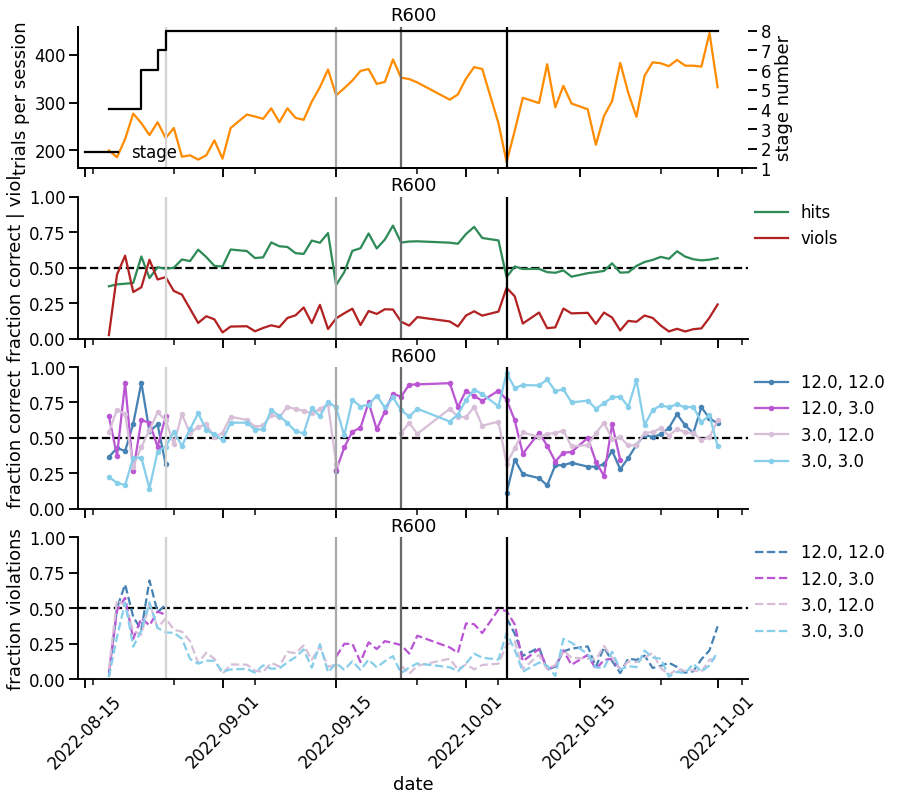

In [12]:
fig, axs = plt.subplots(4, 1, figsize=(12, 12), sharex=True)
animal_id = 'R600'
df = df_stable.query("animal_id == 'R600'")
plot_stage_and_trials(df, axs[0], animal_id)
plot_hits_and_viols(df, axs[1], animal_id)
plot_pair_performance(df, axs[2], animal_id)
plot_pair_violations(df, axs[3], animal_id)

for iax in range(len(axs)):
    axs[iax].axvline(pd.Timestamp('2022-08-25'),color='lightgray')
    axs[iax].axvline(pd.Timestamp('2022-09-15'),color='darkgray')
    axs[iax].axvline(pd.Timestamp('2022-09-23'),color='dimgray')
    axs[iax].axvline(pd.Timestamp('2022-10-06'),color='black')
    if iax > 0:
        axs[iax].axhline(0.5, color='k', linestyle='--', zorder=1)


3.0, 3.0       84
12.0, 12.0    124
3.0, 12.0     124
Name: sound_pair, dtype: int64


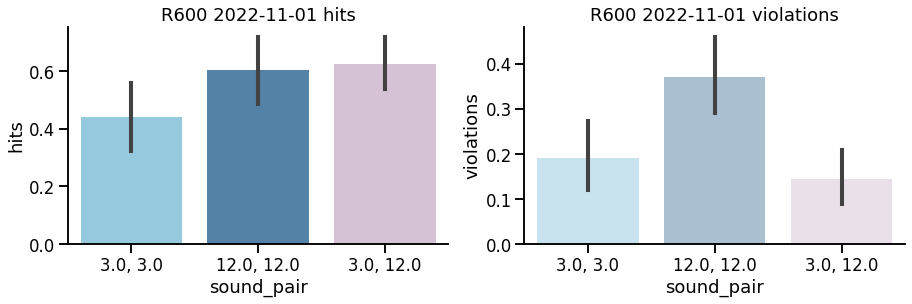

In [13]:
fig,ax = plt.subplots(1,2, figsize=(15,4))
single_day_pair_perf(df, ax[0])
single_day_pair_viols(df, ax[1])